<a href="https://colab.research.google.com/github/RitvikPrabhu/Machine-Learning/blob/master/Pattern_Prediction/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
N = 5000
X = np.linspace(0, 15, N)
Y = 10*(np.cos(10*X)) + 9*(np.cos(9*X)) + 8*(np.cos(8*X)) + \
7*(np.cos(7*X)) + 6*(np.cos(6*X)) + 5*(np.cos(5*X)) + 4*(np.cos(4*X)) +\
3*(np.cos(3*X)) + 2*(np.cos(2*X)) + np.cos(X)
number = []
dataset = {'Value': Y}

df = pd.DataFrame (dataset, columns = ['Value'])

In [ ]:
df.head()

,Value
0,55.000000
1,54.986383
2,54.945540
3,54.877499
4,54.782304


In [ ]:
df.tail()

,Value
4995,1.438190
4996,1.604347
4997,1.768455
4998,1.930357
4999,2.089896


In [ ]:
df.describe()

,Value
count,5000.000000
mean,-0.014409
std,14.184037
min,-32.532900
25%,-5.788641
50%,-0.594236
75%,4.958021
max,55.000000


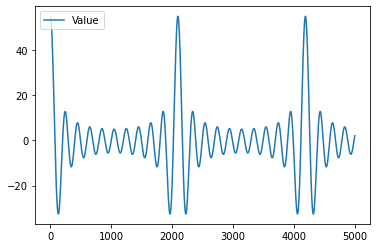

In [ ]:
df.plot()

In [ ]:
#Testing for stationiarity 
#Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Value'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Value'])

ADF Test Statistic : -16.019511283508685
p-value : 6.226922928357393e-29
#Lags Used : 5
Number of Observations Used : 4994
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Autoregresive Model


In [ ]:
#ACF = auto corellation, PACF = Partial autocorrelation
# p,d,q 
#p ~ AR model lags 
#d ~ differencing 
#q ~ MA lags

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

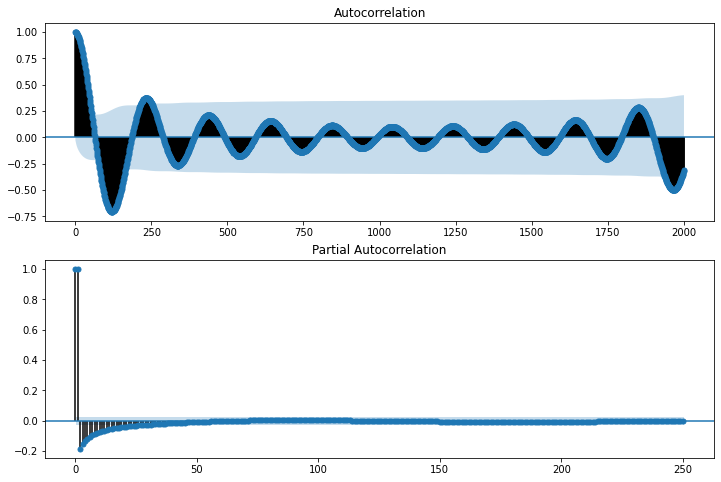

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Value'],lags=2000,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Value'],lags=250,ax=ax2)

In [ ]:
# q = 1500, p = 2, d = 0
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1,0,2),seasonal_order=(1,0,2,1))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


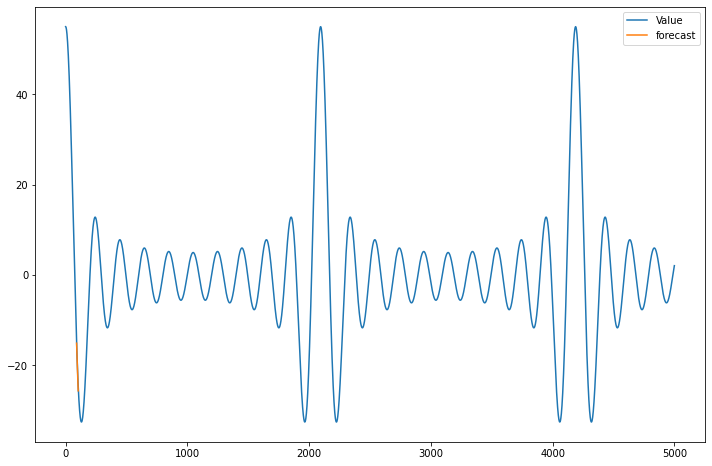

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
future_value=[df.index[-1]]
for i in range(1000):
  future_value.append(future_value[-1]+1)
future_dataset_df=pd.DataFrame(index=future_value[1:],columns=df.columns)

In [ ]:
future_dataset_df=pd.concat([df,future_dataset_df])

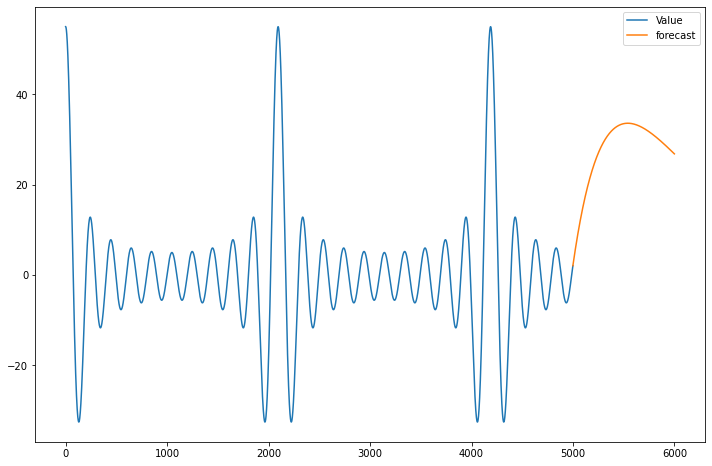

In [ ]:
future_dataset_df['forecast'] = results.predict(start = 4999, end = 5999, dynamic= True)  
future_dataset_df[['Value', 'forecast']].plot(figsize=(12, 8))